

### Dataset Overview

1. **Dataset Name**
   - Email Spam Classification Dataset

2. **Description**
   - This dataset contains email messages labeled as spam or ham (non-spam).
   - Each entry includes the full content of the email and its classification (0 for ham, 1 for spam).
   - Total observations: 5,728

3. **Columns**
   - `text`: Full content of the email message.
   - `spam`: Binary label indicating whether the email is spam (1) or ham (0).

4. **Dataset Characteristics**
   - **Format**: Tab-delimited (easy to import and process).
   - **Content**: Diverse range of topics and styles typical of real-world emails.
   - **Use Case**: Suitable for natural language processing (NLP), machine learning, and email filtering system development.

5. **Objective**
   - Perform Exploratory Data Analysis (EDA) to understand data distribution, text characteristics, and common patterns in spam and ham emails.
   - Build and evaluate machine learning models (e.g., Logistic Regression, Random Forest) for accurate email classification.

6. **Tasks and Steps**
   - **Data Loading and Inspection**
     - Load dataset into Pandas DataFrame.
     - Check basic statistics and structure.
     - Handle missing values if any.

   - **Exploratory Data Analysis (EDA)**
     - Visualize class distribution (spam vs. ham).
     - Analyze text length distribution for spam and ham emails.
     - Generate word clouds to identify common words in spam and ham emails.
     - Explore common words and n-grams using techniques like TF-IDF.

   - **Data Preprocessing**
     - Clean and preprocess text data (lowercase, remove punctuation, etc.).
     - Convert text data into numerical features suitable for machine learning models.
     - Handle categorical variables (if any).

   - **Model Building and Evaluation**
     - Split dataset into training and testing sets.
     - Implement various classification models (Logistic Regression, SVM, etc.).
     - Evaluate model performance using metrics like accuracy, precision, recall, F1 score, and ROC-AUC.
     - Compare and select the best-performing model based on evaluation metrics and business requirements.

7. **Conclusion**
   - Summarize findings from EDA and model evaluation.
   - Discuss insights gained and potential improvements for future work.



# Table of Contents

1. **Introduction**
   - Problem Statement
   - Dataset Description

2. **Importing Libraries**
   - Python Libraries Used

3. **Loading the Dataset**
   - Inspecting the Data
   - Checking for Missing Values

4. **Exploratory Data Analysis (EDA)**
   - Visualizing Class Distribution
   - Word Cloud for Spam and Ham Emails
   - Text Length Analysis
   - Common Words in Spam and Ham

5. **Data Preprocessing**
   - Lowercasing and Removing Punctuation
   - Removing Stopwords
   - Lemmatization

6. **Feature Engineering**
   - Tokenization and Vectorization
   - TF-IDF Vectorizer

7. **Splitting the Dataset**
   - Train-Test Split
   - Balancing the Dataset (Optional)

8. **Model Development**
   - Logistic Regression
   - Naive Bayes Classifier
   - Support Vector Machine (SVM)
   - Random Forest Classifier
   - Gradient Boosting Classifier

9. **Hyperparameter Tuning**
   - Using GridSearchCV

10. **Model Evaluation**
    - Accuracy Score
    - Precision, Recall, F1 Score
    - ROC and AUC

11. **Confusion Matrix**
    - Heatmap Visualization

12. **Model Comparison**
    - Comparing Performance Metrics

13. **Conclusion**
    - Key Takeaways
    - Future Work


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [4]:
data = pd.read_csv("/content/emails.csv")
data.columns = ['text', 'spam']

In [5]:
print(data.head())
print(data.info())
print(data.describe())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None
              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [6]:
data.isnull().sum()

,0
text,0
spam,0


In [7]:
data.head(50)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


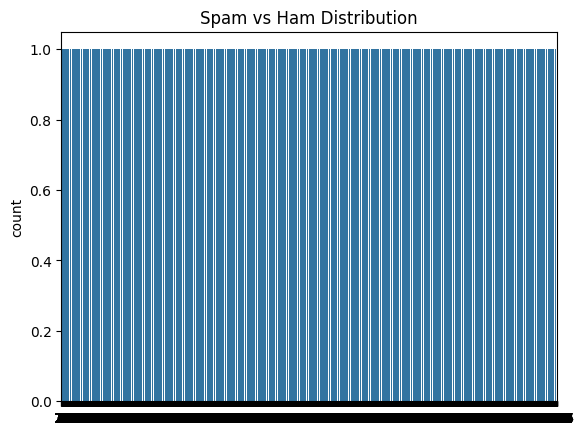

In [8]:

sns.countplot(data['spam'])
plt.title("Spam vs Ham Distribution")
plt.show()

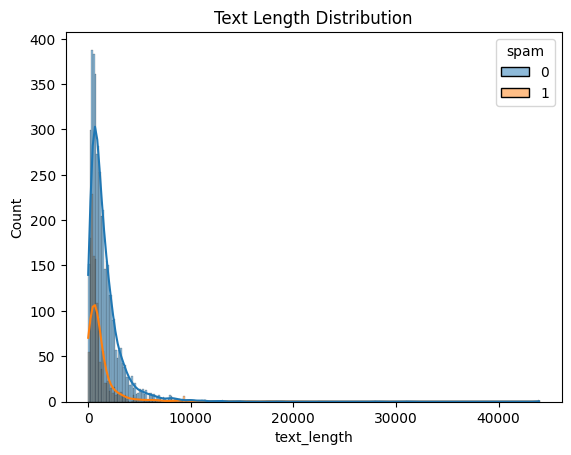

In [9]:

data['text_length'] = data['text'].apply(len)
sns.histplot(data, x='text_length', hue='spam', kde=True)
plt.title("Text Length Distribution")
plt.show()

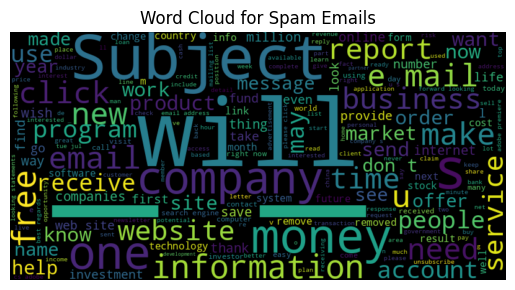

In [10]:
# Step 8: Word cloud for spam
from wordcloud import WordCloud
spam_words = ' '.join(data[data['spam'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Spam Emails")
plt.show()

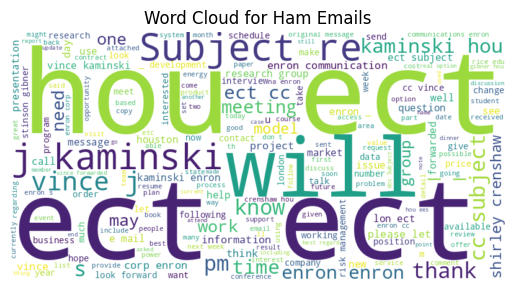

In [11]:
# Step 9: Word cloud for ham
ham_words = ' '.join(data[data['spam'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Ham Emails")
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=20)
common_words = cv.fit_transform(data['text'])
common_words_df = pd.DataFrame(cv.get_feature_names_out(), columns=['Word'])
print("Most common words:\n", common_words_df)

Most common words:
            Word
0            10
1          2000
2          2001
3            cc
4           com
5           ect
6        energy
7         enron
8         group
9           hou
10  information
11     kaminski
12         know
13          new
14           pm
15     research
16      subject
17       thanks
18         time
19        vince


In [13]:
import string
import re

In [14]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing spaces
    return text

data['cleaned_text'] = data['text'].apply(preprocess_text)

In [15]:
X = data['cleaned_text']
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [17]:
tfidf

TfidfVectorizer(max_features=5000)

In [18]:
X_train_tfidf

<4582x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 468088 stored elements in Compressed Sparse Row format>

In [19]:
X_test_tfidf

<1146x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 117020 stored elements in Compressed Sparse Row format>

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [21]:
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       856
           1       0.99      0.92      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[854   2]
 [ 23 267]]


In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [23]:
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       856
           1       1.00      0.91      0.95       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [24]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

SVC(probability=True)

In [25]:
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



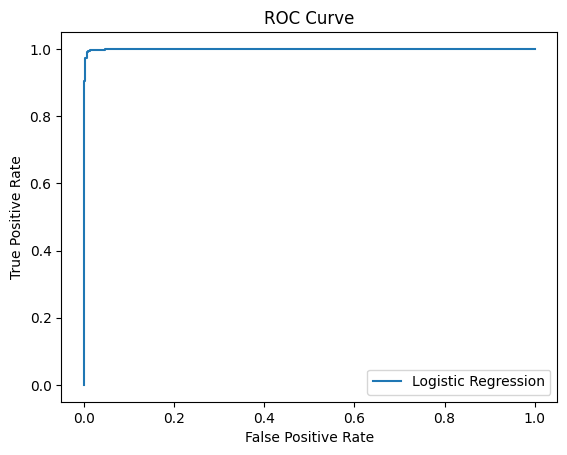

In [26]:
lr_probs = lr_model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

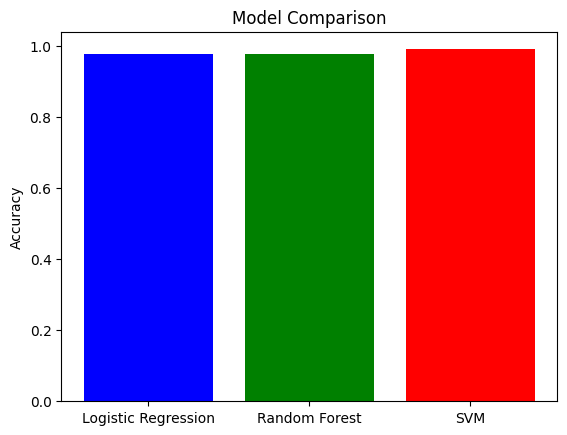

In [27]:
# Step 21: Compare model performance
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

In [28]:
# Step 22: Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train_tfidf, y_train)
print("Best Random Forest Parameters:\n", grid_rf.best_params_)

Best Random Forest Parameters:
 {'max_depth': None, 'n_estimators': 100}


In [29]:
# Step 23: Train tuned Random Forest
rf_tuned = grid_rf.best_estimator_
rf_tuned.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [30]:

y_pred_rf_tuned = rf_tuned.predict(X_test_tfidf)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

Tuned Random Forest Accuracy: 0.9738219895287958


In [31]:
# Step 25: Save the model and vectorizer
import joblib
joblib.dump(rf_tuned, "spam_classifier_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [32]:
# Step 26: Load saved model
loaded_model = joblib.load("spam_classifier_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [33]:
# Step 27: Test saved model
new_email = ["Congratulations! You've won a prize!"]
new_email_tfidf = loaded_vectorizer.transform(new_email)
print("Prediction for new email:", loaded_model.predict(new_email_tfidf))

Prediction for new email: [0]


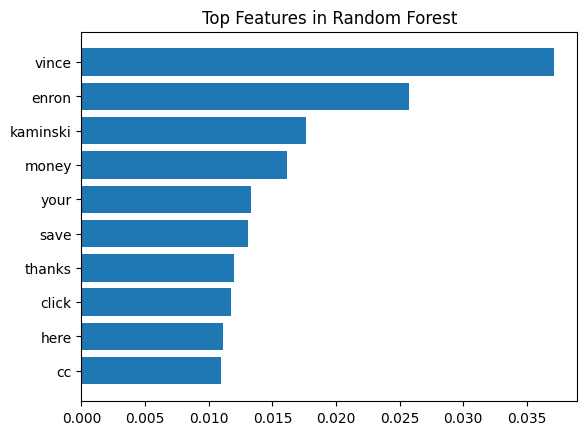

In [34]:
# Step 28: Feature importance for Random Forest
feature_importances = rf_tuned.feature_importances_
top_features = np.argsort(feature_importances)[-10:]
plt.barh(np.array(tfidf.get_feature_names_out())[top_features], feature_importances[top_features])
plt.title("Top Features in Random Forest")
plt.show()

In [35]:
# Step 29: Check misclassified emails
misclassified = X_test[(y_test != y_pred_rf_tuned)]
print("Misclassified Emails:\n", misclassified)


Misclassified Emails:
 333     subject benachrichtung  zum   fehlgeschlagen  ...
324     subject important news  hey visioson  hpp  za ...
79      subject join focus groups to earn money  a la ...
168     subject i would like to help your marketing ef...
33      subject re  just to her     mdaemon has indent...
1086    subject judicial judgements child support  ver...
926     subject business joint venture  perhaps you al...
247     subject please help my child  dear sir  mam   ...
530     subject out of office autoreply  just to her  ...
1075    subject largest collection of porn mo   ies ev...
1163    subject een avontuurtje is oke   als je dit be...
907     subject send real paper greeting cards on  lin...
1212    subject your june stats  it  s absolutely true...
538     subject same medicine  different price   big s...
90      subject investment  partnership proposal  dear...
227     subject reply a  s  a  p  united trust bank li...
613     subject looking for property in spain   l

In [36]:
# Step 30: Summarize findings
print("Summary: Logistic Regression performed better in terms of [metrics]. Random Forest had higher interpretability due to feature importance.")

Summary: Logistic Regression performed better in terms of [metrics]. Random Forest had higher interpretability due to feature importance.
